In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.precision',3)
import helperfunction as hf

In [2]:
filepath = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/rt.movie_info.tsv.gz'
rt_movie = pd.read_csv(filepath, sep = '\t', encoding = 'latin-1')

In [3]:
filepath2 = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/rt.reviews.tsv.gz'
rt_reviews = pd.read_csv(filepath2, sep = '\t', encoding = 'latin-1')

In [4]:
# combine the two table by id 
rt_merged = hf.merge_tables(rt_movie, rt_reviews,'id', 'inner')

In [5]:
rt_merged.head(2)

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [6]:
# remove a few columns id, synopsis, dvd_date, currency, studio, review, rating_y, critic, publisher, date
rt_merged=hf.drop_columns(rt_merged,'id','synopsis','dvd_date','currency','studio','review','rating_y','critic',
                         'publisher','date')

In [7]:
rt_merged.head(2)

,rating_x,genre,director,writer,theater_date,box_office,runtime,fresh,top_critic
0,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",108 minutes,fresh,0
1,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",108 minutes,rotten,0


In [8]:
rt_merged = hf.rename_columns(rt_merged,{'rating_x':'parental_guide'})

In [9]:
rt_merged.theater_date = pd.to_datetime(rt_merged.theater_date)

In [10]:
rt_merged.head()

,parental_guide,genre,director,writer,theater_date,box_office,runtime,fresh,top_critic
0,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"600,000",108 minutes,fresh,0
1,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"600,000",108 minutes,rotten,0
2,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"600,000",108 minutes,fresh,0
3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"600,000",108 minutes,fresh,0
4,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"600,000",108 minutes,fresh,0


In [11]:
# format fresh column to 0 and 1 
rt_merged = hf.object_binary(rt_merged,'fresh','fresh')

In [12]:
# groupby theater_date (assume unique movie) then count average tomatoes
fresh_percent = rt_merged.groupby('theater_date').fresh.mean().reset_index()

In [13]:
# remove duplicate rows
rt_merged = hf.drop_repeatrows(rt_merged,'theater_date')

In [14]:
# merged with fresh % to analyze box office and fresh % 
rt_merged = hf.merge_tables(fresh_percent, rt_merged, 'theater_date', 'inner')

In [15]:
rt_merged.head()

,theater_date,fresh_x,parental_guide,genre,director,writer,box_office,runtime,fresh_y,top_critic
0,1921-01-01,0.875,NR,Classics|Drama|Romance,George Melford|George Fitzmaurice,NaN,NaN,80 minutes,0,1
1,1922-03-04,0.967,NR,Art House and International|Classics|Horror|Sc...,NaN,Henrik Galeen,NaN,63 minutes,1,0
2,1932-03-22,1.000,NR,Classics|Comedy|Musical and Performing Arts|Ro...,George Cukor|Ernst Lubitsch,Samson Raphaelson,NaN,80 minutes,1,0
3,1932-11-19,1.000,NR,Classics|Drama|Mystery and Suspense,Mervyn Le Roy,Sheridan Gibney|Brown Holmes,NaN,90 minutes,1,0
4,1933-02-09,0.895,NR,Classics|Comedy,Lowell Sherman,Mae West|Harvey Thew|John Bright,NaN,65 minutes,0,0


In [16]:
# edit box_office into int for scatter plot 
hf.stringtonum(rt_merged, ['box_office'], ',')

,theater_date,fresh_x,parental_guide,genre,director,writer,box_office,runtime,fresh_y,top_critic
0,1921-01-01,0.875,NR,Classics|Drama|Romance,George Melford|George Fitzmaurice,NaN,NaN,80 minutes,0,1
1,1922-03-04,0.967,NR,Art House and International|Classics|Horror|Sc...,NaN,Henrik Galeen,NaN,63 minutes,1,0
2,1932-03-22,1.000,NR,Classics|Comedy|Musical and Performing Arts|Ro...,George Cukor|Ernst Lubitsch,Samson Raphaelson,NaN,80 minutes,1,0
3,1932-11-19,1.000,NR,Classics|Drama|Mystery and Suspense,Mervyn Le Roy,Sheridan Gibney|Brown Holmes,NaN,90 minutes,1,0
4,1933-02-09,0.895,NR,Classics|Comedy,Lowell Sherman,Mae West|Harvey Thew|John Bright,NaN,65 minutes,0,0
5,1933-09-15,1.000,NR,Action and Adventure|Classics|Western,Henry Hathaway,Jack Cunningham,NaN,70 minutes,1,0
6,1934-05-10,0.000,NR,Classics|Western,NaN,NaN,NaN,59 minutes,0,0
7,1934-05-15,1.000,NR,Classics|Drama|Science Fiction and Fantasy,Fritz Lang,Fritz Lang|Robert Liebmann|Charles Spaak/ Bern...,NaN,85 minutes,1,1
8,1937-01-01,0.625,NR,Classics|Drama|Mystery and Suspense,Henry King,Niven Busch|Sonya Levien|Lamar Trotti,NaN,110 minutes,1,0
9,1937-04-30,0.500,NR,Classics|Drama|Mystery and Suspense,Richard Thorpe,John Van Druten,NaN,117 minutes,0,0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


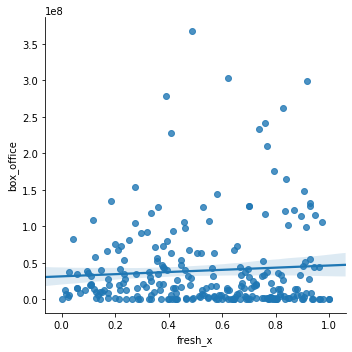

In [17]:
import seaborn as sns
# check for relationship 
sns.lmplot(x="fresh_x", y="box_office", data=rt_merged);

In [18]:
# split into separate genres and check for genres effect on fresh_percent 
# which genres produce most fresh 
genres_table = hf.split_rows(rt_merged,'theater_date','genre', sep='|')

In [19]:
# merge genre_table with fresh
genres_table.head()

,genre,theater_date
0,Classics,1921-01-01
1,Drama,1921-01-01
2,Romance,1921-01-01
3,Art House and International,1922-03-04
4,Classics,1922-03-04


In [20]:
# join fresh with genres
genres_fresh = hf.merge_tables(genres_table, fresh_percent, 'theater_date','left')

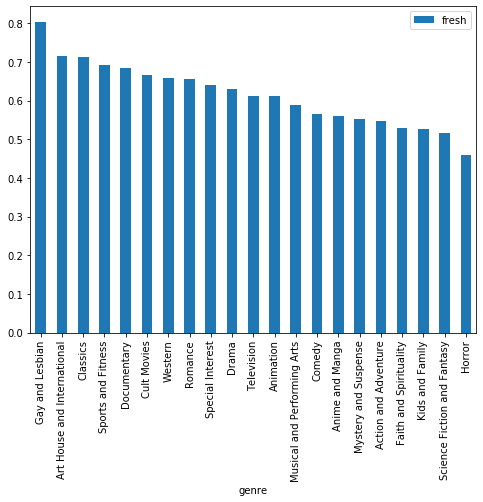

In [21]:
# check for which genres produce most critically acclaimed fresh tomatoes 
genres_fresh.groupby('genre').mean().sort_values('fresh', ascending = False).plot.bar(figsize = (8,6))